In [73]:
 #Importing Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
#Read Data
df=pd.read_csv("Housing.csv")
df.head()
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [75]:
#Encode Categorical and Binary Features
df.loc[df['mainroad']=='yes','mainroad']=1
df.loc[df['mainroad']=='no','mainroad']=0
df.loc[df['guestroom']=='yes','guestroom']=1
df.loc[df['guestroom']=='no','guestroom']=0
df.loc[df['basement']=='yes','basement']=1
df.loc[df['basement']=='no','basement']=0
df.loc[df['hotwaterheating']=='yes','hotwaterheating']=1
df.loc[df['hotwaterheating']=='no','hotwaterheating']=0
df.loc[df['airconditioning']=='yes','airconditioning']=1
df.loc[df['airconditioning']=='no','airconditioning']=0
df.loc[df['prefarea']=='yes','prefarea']=1
df.loc[df['prefarea']=='no','prefarea']=0
df.loc[df['furnishingstatus']=='furnished','furnishingstatus']=2
df.loc[df['furnishingstatus']=='semi-furnished','furnishingstatus']=1
df.loc[df['furnishingstatus']=='unfurnished','furnishingstatus']=0


In [76]:
#Normalise the Data. 
#Normalise the continuous features.
def normalise_columns(df, columns):    
    df_copy = df.copy()
    for col in columns:
        min_val = df_copy[col].min()
        max_val = df_copy[col].max()
        if min_val!=max_val:
            df_copy[col] = (df_copy[col] - min_val) /(max_val-min_val)
    return df_copy

In [77]:
def standardise_columns(df, columns):    
    df_copy = df.copy()
    for col in columns:
        mean = df_copy[col].mean()
        std = df_copy[col].std()
        if std!=0:
            df_copy[col] = (df_copy[col] - mean) /(std)
    return df_copy

In [78]:
#Normalise the Data
df=normalise_columns(df,['price','area'])
# df=standardise_columns(df,['price','area'])

In [79]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,2.965138,1.286239,1.805505,0.693578
std,0.161943,0.149151,0.738064,0.502470,0.867492,0.861586
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.145455,0.134021,2.000000,1.000000,1.000000,0.000000
50%,0.224242,0.202749,3.000000,1.000000,2.000000,0.000000
75%,0.345455,0.323711,3.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,6.000000,4.000000,4.000000,3.000000


In [80]:
y=np.array(df['price'])
x=np.array(df.drop('price',axis=1))


In [81]:
#Make the X as coloumn Matrix
x=x.T

In [82]:
#Add the Bias Parameter as the first row
x=np.insert(x,0,np.ones(x.shape[1]),axis=0)

In [83]:
#Loss Function
def J(x,y,w,n=1):
  y_pred=w.T@x
  loss=0.5*(np.sum((y-y_pred)**2))*(1/n)
  return loss

In [ ]:
#Absolute Error

In [84]:
#Online Gradient Descent Function
def online_gradient(x,y,w,lr=0.01):
  y_pred=np.dot(w,x)
  grad=-(y-y_pred)
  w=w-lr*(grad*x)
  return w



In [89]:
#Initialise the Weights for Online Gradient Descent
w=[]
lr=[]
i=0.001
for _ in range(3):
  w.append(np.zeros(x.shape[0]))
  lr.append(i)
  i=i/10

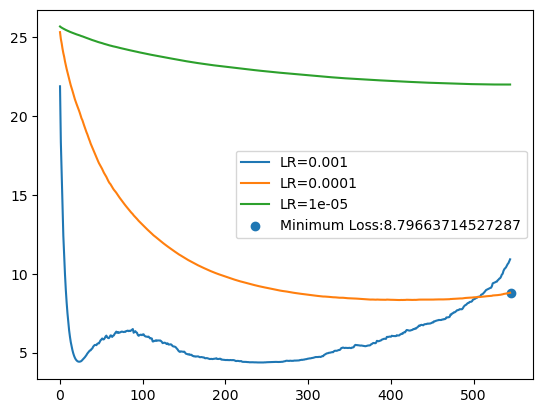

In [90]:
min_loss=1e100
for i in range(len(w)):
  loss_vals=[]
  for _ in range(len(y)):
    w[i]=online_gradient(x[:,_],y[_],w[i],lr[i])
    loss=J(x,y,w[i])
    loss_vals.append(loss)
  # print(w[i])
  min_loss=min(min_loss,loss_vals[-1])
  plt.plot(loss_vals,label=f'LR={lr[i]}')
plt.scatter(len(y),min_loss,label=f"Minimum Loss:{min_loss}")
plt.legend()
plt.show()

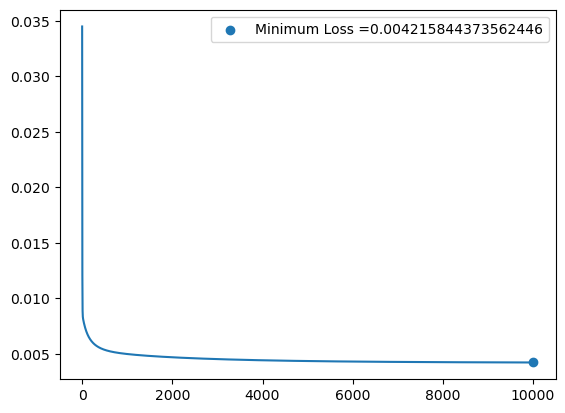

0.004215844373562446


In [88]:
#Batch Gradient Descent
weights=np.zeros(x.shape[0])
lr=0.01
loss_vals=[]
n=len(y)
epochs=10000
for _ in range(epochs):
  y_pred=weights.T@x
  grad=-(x@(y-y_pred).T)*(1/n)
  weights=weights-lr*grad
  loss_vals.append(J(x,y,weights,n))
plt.plot(loss_vals)
plt.scatter(epochs-1,loss_vals[-1],label=f"Minimum Loss ={loss_vals[-1]}")
plt.legend()
plt.show()
print(loss_vals[-1])